<a href="https://colab.research.google.com/github/Srikar2507/ML_LAB/blob/main/1BM22CS289_LAB4_REGRESSION_TREE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Preview:
   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa
Accuracy Score: 1.0
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


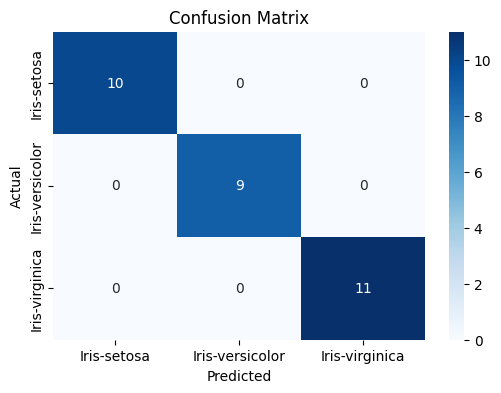

In [9]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

file_path = "iris (1).csv"
iris_df = pd.read_csv(file_path)

print("Dataset Preview:")
print(iris_df.head())

X = iris_df.iloc[:, :-1]
y = iris_df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred = dt_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy Score:", accuracy)
print("Confusion Matrix:")
print(conf_matrix)

plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()



Accuracy: 1.00
              precision    recall  f1-score   support

          No       1.00      1.00      1.00         2
         Yes       1.00      1.00      1.00         1

    accuracy                           1.00         3
   macro avg       1.00      1.00      1.00         3
weighted avg       1.00      1.00      1.00         3



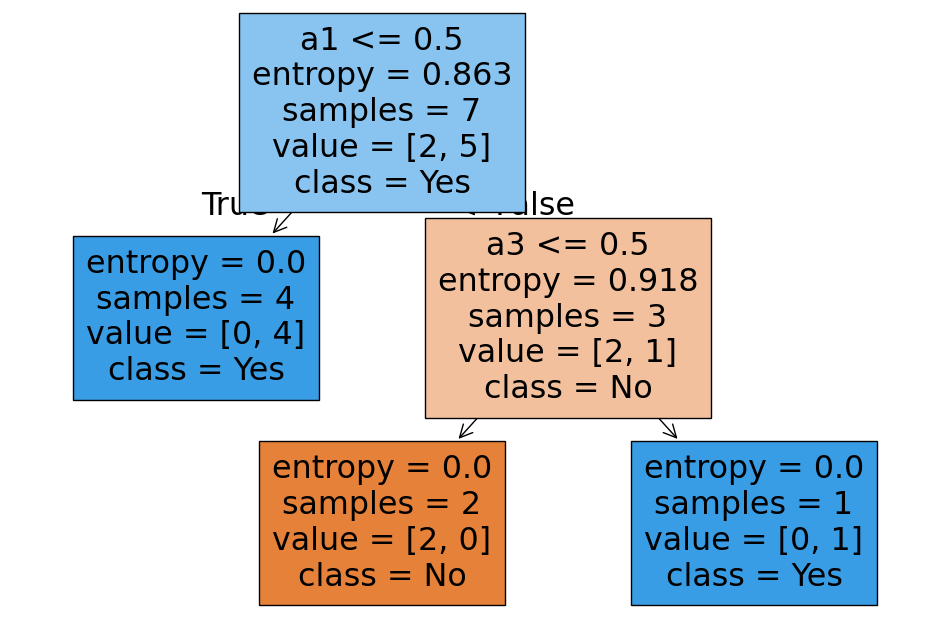

In [17]:
# -*- coding: utf-8 -*-
"""Decision_Tree.ipynb

Automatically generated by Colab.

Original file is located at
    https://colab.research.google.com/drive/1RXDK8CR1doVCMHgkaXpJsNLAvzOIaXdd
"""

import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Create the dataset
data = {
    'a1': [True, True, False, False, False, True, True, True, False, False],
    'a2': ['Hot', 'Hot', 'Hot', 'Cool', 'Cool', 'Cool', 'Hot', 'Hot', 'Cool', 'Cool'],
    'a3': ['High', 'High', 'High', 'Normal', 'Normal', 'High', 'High', 'Normal', 'Normal', 'High'],
    'Classification': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes']
}

data

# Convert to DataFrame
df = pd.DataFrame(data)

# Convert categorical data to numerical data
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split the dataset into features and target
X = df.drop('Classification', axis=1)
y = df['Classification']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Decision Tree Classifier with entropy as the criterion
clf = DecisionTreeClassifier(criterion='entropy')

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print(classification_report(y_test, y_pred, target_names=['No', 'Yes']))

# Optionally, visualize the decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=['No', 'Yes'])
plt.show()

Drug Dataset:
Accuracy Score: 1.0


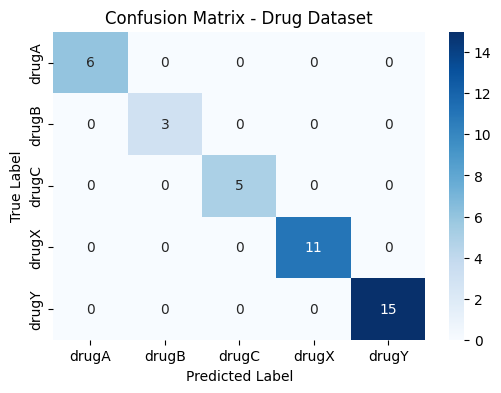

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

drug = pd.read_csv("drug.csv")
X_drug = drug.iloc[:, :-1]
y_drug = drug.iloc[:, -1]

label_encoders = {}
for col in ['Sex', 'BP', 'Cholesterol']:
    label_encoders[col] = LabelEncoder()
    X_drug[col] = label_encoders[col].fit_transform(X_drug[col])

X_train_drug, X_test_drug, y_train_drug, y_test_drug = train_test_split(X_drug, y_drug, test_size=0.2, random_state=42)

clf_drug = DecisionTreeClassifier()
clf_drug.fit(X_train_drug, y_train_drug)

y_pred_drug = clf_drug.predict(X_test_drug)
print("Drug Dataset:")
print("Accuracy Score:", accuracy_score(y_test_drug, y_pred_drug))

cm = confusion_matrix(y_test_drug, y_pred_drug)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=clf_drug.classes_, yticklabels=clf_drug.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Drug Dataset")
plt.show()


Petrol Consumption Prediction:
Mean Absolute Error: 80.8
Mean Squared Error: 15275.4
Root Mean Squared Error: 123.59368915927706


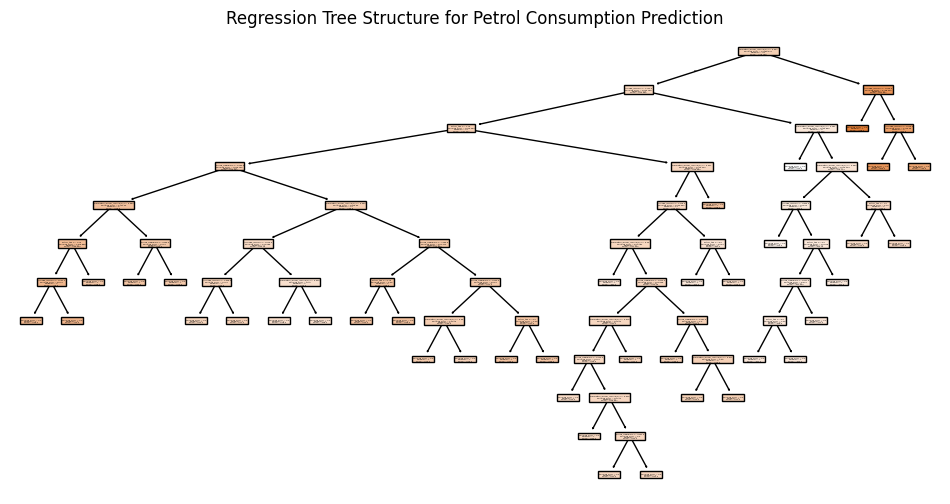

Feature Importances: [('Population_Driver_licence(%)', np.float64(0.6606038793328037)), ('Average_income', np.float64(0.2304077533985755)), ('Petrol_tax', np.float64(0.06363541751955505)), ('Paved_Highways', np.float64(0.045352949749065695))]


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error

petrol = pd.read_csv("petrol_consumption.csv")
X_petrol = petrol.iloc[:, :-1]
y_petrol = petrol.iloc[:, -1]

X_train_petrol, X_test_petrol, y_train_petrol, y_test_petrol = train_test_split(X_petrol, y_petrol, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor()
regressor.fit(X_train_petrol, y_train_petrol)

y_pred_petrol = regressor.predict(X_test_petrol)

mae = mean_absolute_error(y_test_petrol, y_pred_petrol)
mse = mean_squared_error(y_test_petrol, y_pred_petrol)
rmse = np.sqrt(mse)

print("Petrol Consumption Prediction:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

plt.figure(figsize=(12, 6))
plot_tree(regressor, feature_names=X_petrol.columns, filled=True)
plt.title("Regression Tree Structure for Petrol Consumption Prediction")
plt.show()

feature_importance = regressor.feature_importances_
feature_names = X_petrol.columns
sorted_features = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)
print("Feature Importances:", sorted_features)


Petrol Consumption Prediction:
Mean Absolute Error: 96.9
Mean Squared Error: 17661.3
Root Mean Squared Error: 132.8958238621515


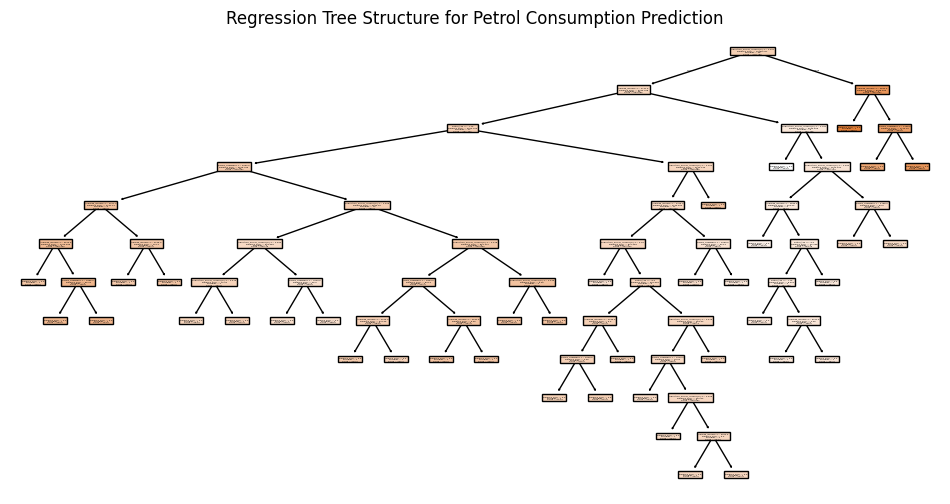

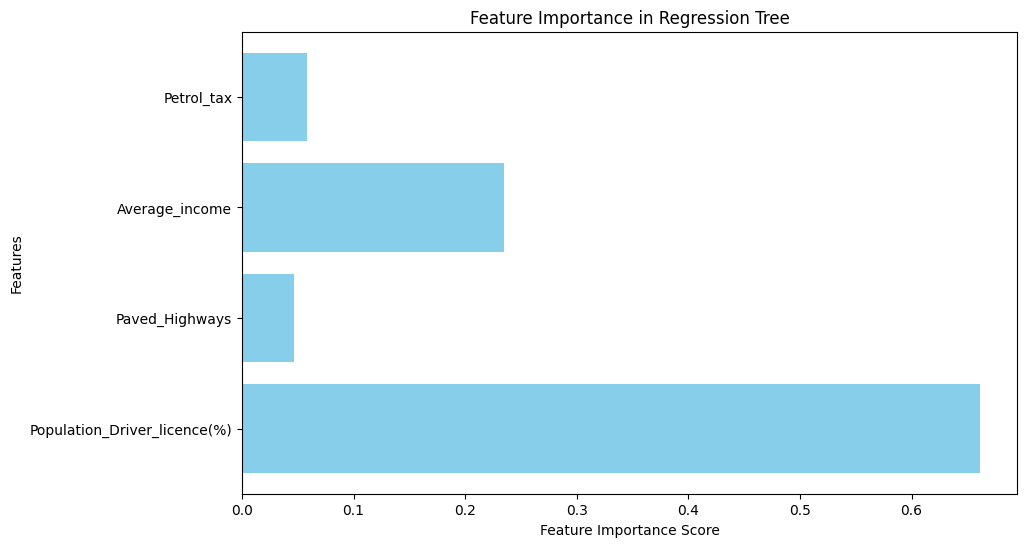

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_absolute_error, mean_squared_error

petrol = pd.read_csv("petrol_consumption.csv")
X_petrol = petrol.iloc[:, :-1]
y_petrol = petrol.iloc[:, -1]

X_train_petrol, X_test_petrol, y_train_petrol, y_test_petrol = train_test_split(X_petrol, y_petrol, test_size=0.2, random_state=42)

regressor = DecisionTreeRegressor()
regressor.fit(X_train_petrol, y_train_petrol)

y_pred_petrol = regressor.predict(X_test_petrol)

mae = mean_absolute_error(y_test_petrol, y_pred_petrol)
mse = mean_squared_error(y_test_petrol, y_pred_petrol)
rmse = np.sqrt(mse)

print("Petrol Consumption Prediction:")
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

plt.figure(figsize=(12, 6))
plot_tree(regressor, feature_names=X_petrol.columns, filled=True)
plt.title("Regression Tree Structure for Petrol Consumption Prediction")
plt.show()

feature_importance = regressor.feature_importances_
feature_names = X_petrol.columns

plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importance, color='skyblue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Regression Tree")
plt.gca().invert_yaxis()
plt.show()
